In [6]:
! pip install pandas seaborn scikit-learn

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.2 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.2 MB 4.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.2 MB 3.9 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.2 MB 3.9 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.2 MB 4.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.2 MB 4.0 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.2 MB 3.4 MB/s eta 0:00:03
   --------------------- ------------------ 6.0/11.2 MB 3.8 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.2 MB 3.8 MB/s eta 0:00:02
   ---------------------------- ----------- 7.9/11.2 MB 3.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.2 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.2 MB 3.8 MB/s eta 0:00:01
   ---

In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import logging
from datetime import datetime
from sklearn.impute import SimpleImputer
 

In [3]:
# Set log directory and ensure it exists
log_dir = '../logs'
os.makedirs(log_dir, exist_ok=True)

# Create dynamic filename with timestamp
file_name = f'logs_{datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.txt'

# Configure logging
logging.basicConfig(
    filename=os.path.join(log_dir, file_name),
    format='%(asctime)s %(message)s',
    filemode='w'
)

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

logger.info("Logger initialized and working.")

In [4]:
### Load dataset 
try : 
    logger.info("Loading CSV FILE")
    df = pd.read_csv('../data/day.csv')
except Exception as e : 
    logger.info(e)

In [5]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [22]:
def Preprocessing(df) : 
     """
     this function is used to preprocess the data 
     args : dataframe
     return : dataframe 
     """
     ### Check null / duplicated 
     impute = SimpleImputer(strategy ='median')
     number_of_nulls = df.isna().sum()
     if (number_of_nulls != 0).any() :
          df  = impute.fit_transform(df)
     if not df.duplicated().sum() : 
          df.drop_duplicates(inplace=True) 
     return df 

In [23]:
df_preprocessed = Preprocessing(df)

In [ ]:
def outliers(df=df, column_name=None) :
    q1 = df[column_name].quantile(.25)
    q3 = df[column_name].quantile(.75)
    iqr = q3 - q1 
    lower_bound = q1 - (iqr *1.5)
    upper_bound = q3 + (iqr *1.5)
    number_of_outliers = df[(df[column_name] > upper_bound) | (df[column_name]< lower_bound)].shape[0]
    return number_of_outliers


In [ ]:
oulier_col_name = []
for col_name in df.select_dtypes('number')  :
    if outliers(df, col_name) : 
        oulier_col_name.append(col_name)
    print(f"Column_name : {col_name}, {outliers(df, col_name)}")

In [29]:
class Data_Preprocessing : 
     def Preprocessing(df) : 
          """
          this function is used to preprocess the data 
          args : dataframe
          return : dataframe 
          """
          ### Check null / duplicated 
          # 
          impute = SimpleImputer(strategy ='median')
          number_of_nulls = df.isna().sum()
          if (number_of_nulls != 0).any() :
               df  = impute.fit_transform(df)
          if not df.duplicated().sum() : 
               df.drop_duplicates(inplace=True) 
          return df 
     def outliers(df=df, column_name=None) :
          q1 = df[column_name].quantile(.25)
          q3 = df[column_name].quantile(.75)
          iqr = q3 - q1 
          lower_bound = q1 - (iqr *1.5)
          upper_bound = q3 + (iqr *1.5)
          number_of_outliers = df[(df[column_name] > upper_bound) | (df[column_name]< lower_bound)].shape[0]
          return number_of_outliers

In [30]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<Axes: xlabel='mnth', ylabel='cnt'>

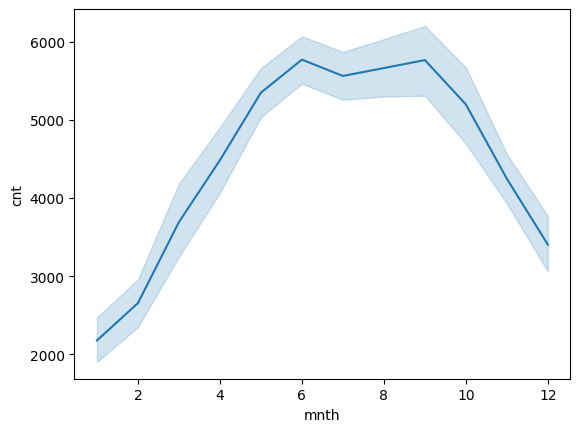

In [34]:
sns.lineplot(df,x='mnth', y='cnt' )

<Axes: xlabel='windspeed', ylabel='cnt'>

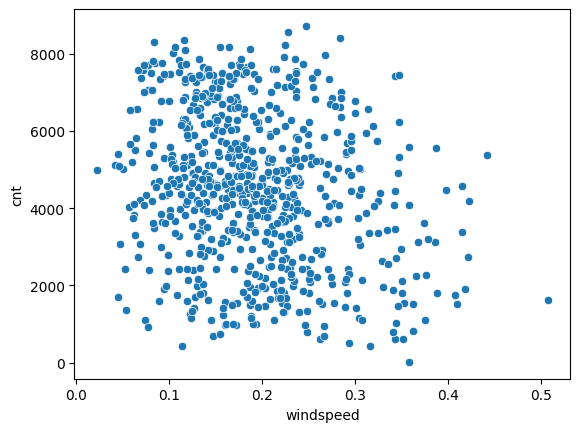

In [37]:
sns.scatterplot(df,x='windspeed', y='cnt')

In [44]:
### Remove unwanted columns 
df.drop(['instant','yr','dteday','casual','registered'], axis=1 , inplace=True, errors='ignore')
#### instant / dteday / yr 

In [ ]:
from sklearn.linear_model import LinearRegression, 

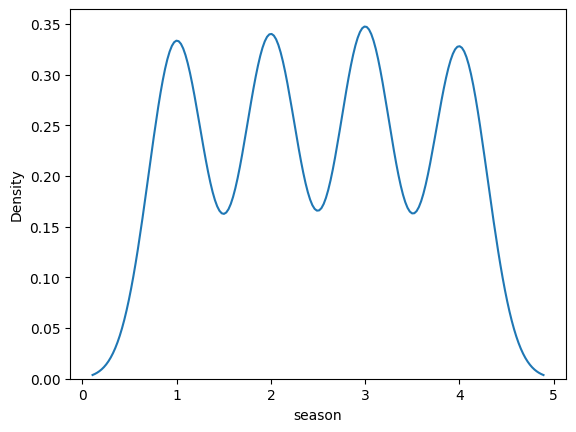

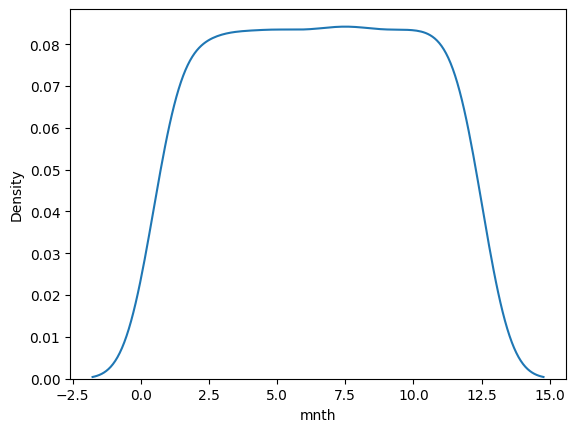

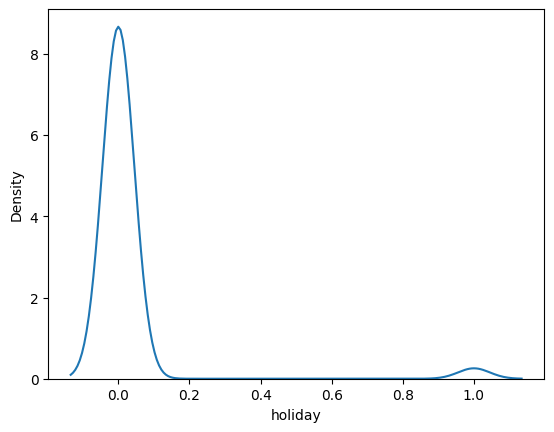

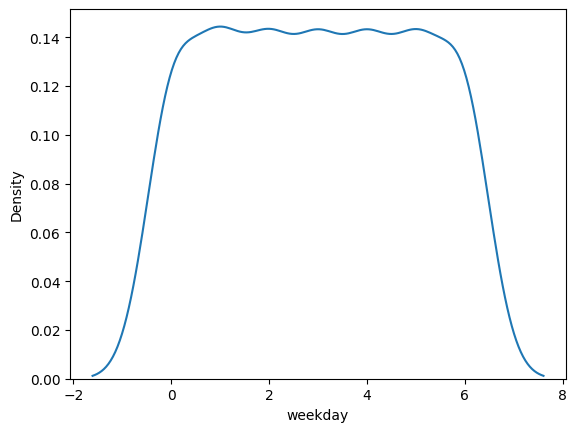

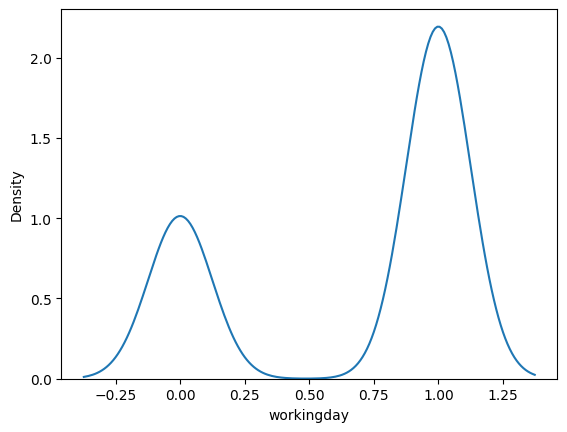

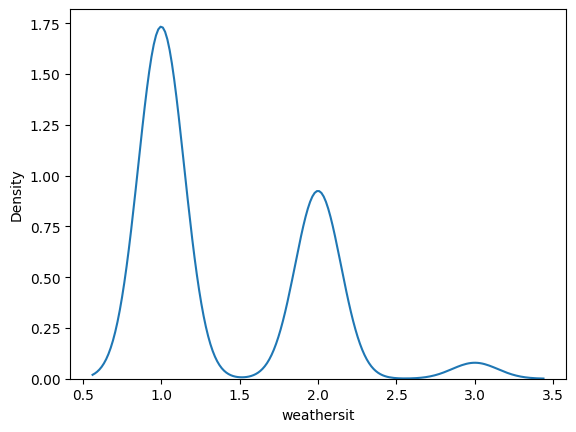

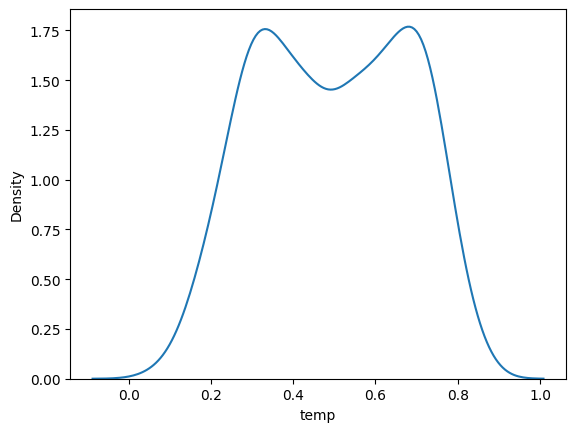

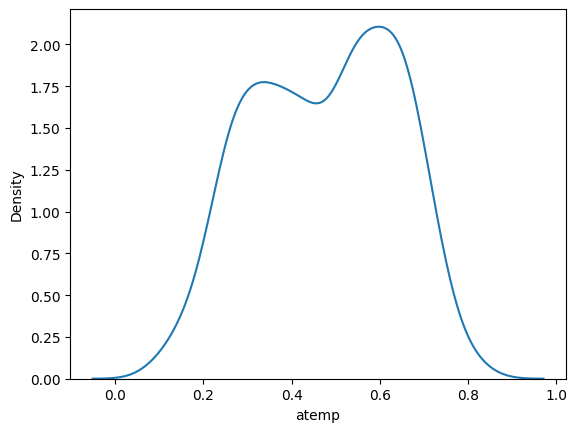

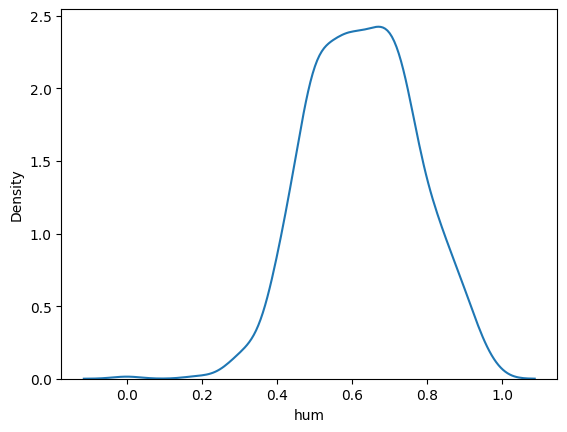

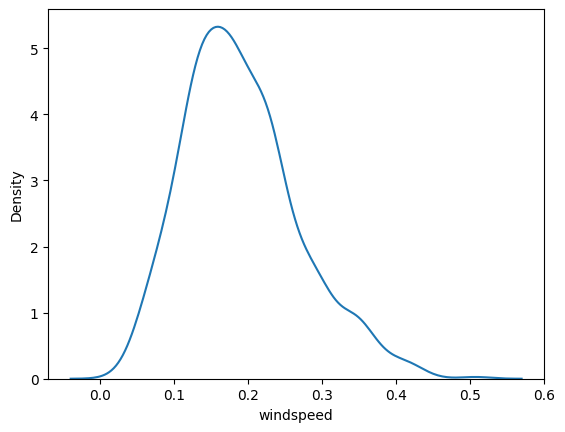

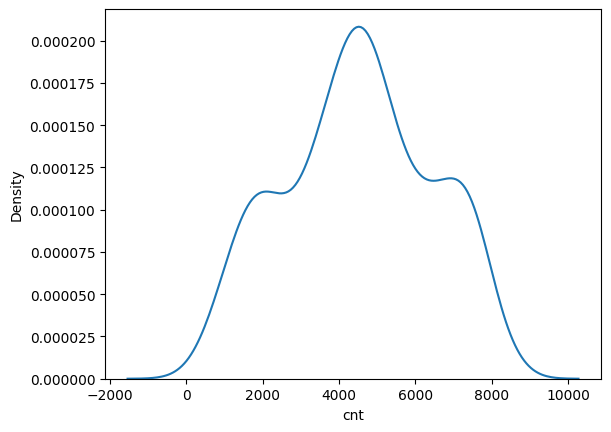

In [48]:
for i in df.columns : 
    sns.kdeplot(df,x = i )
    plt.show()

In [52]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('cnt',axis=1), df['cnt'], test_size=.2)

In [60]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [61]:
lr = LinearRegression()
svr = SVR()
dt = DecisionTreeRegressor()


In [62]:
lr.fit(x_train, y_train_log)
svr.fit(x_train, y_train_log)
dt.fit(x_train, y_train_log)

DecisionTreeRegressor()

In [64]:
### Model Evaluation 
lr_pred = lr.predict(x_test)
svr_pred = svr.predict(x_test)
dt_pred = dt.predict(x_test)

In [65]:
print(f'Linear Regression MAE : {mean_absolute_error(y_test_log, lr_pred)}')
print(f'SVR MAE : {mean_absolute_error(y_test_log, svr_pred)}')
print(f'dt MAE : {mean_absolute_error(y_test_log, dt_pred)}')

Linear Regression MAE : 0.30918794874506056
SVR MAE : 0.3168223890549234
dt MAE : 0.336198314235659


In [79]:
### Linear Regression Confidance Interval 
resudal  = y_test_log - lr.predict(x_test)
std = resudal.std()
error_margin = std*1.9

In [80]:
df.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [81]:
pred = lr.predict([[1,4,0,1,0,2,.4,.5,.3,.7]])

d:\project\Depi_project\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [85]:
print(f"the prediction  : {np.exp(pred)}")
print(f"Margin of error is between {np.exp((pred+error_margin))}  and  {np.exp((pred- error_margin))} with 95% confidence")

the prediction  : [1871.01370733]
Margin of error is between [3832.75928033]  and  [913.36085493] with 95% confidence


In [86]:
import pickle 

with open("../artifacts/lr.pkl",'wb') as f  :
    pickle.dump(lr,f)